# 20240915
★ shot grid 수정해야함.  그냥 단순히 step pitch로 쪼개놓은것임.-> 개선필요

1. Shot Left부분 그리기. 
   wafer정센터(0,0)에서 step_pitch의 절반만큼 -방향으로 이동. 
   
2. map shift 고려. 
   map shift만큼을 더해준다.

3. +방향에서는 step pitch만큼 n개씩 더해준다. 
   -방향에서는 step pitch만큼 m개씩 빼준다. 

   




<class 'numpy.float64'>
<class 'pandas.core.series.Series'>


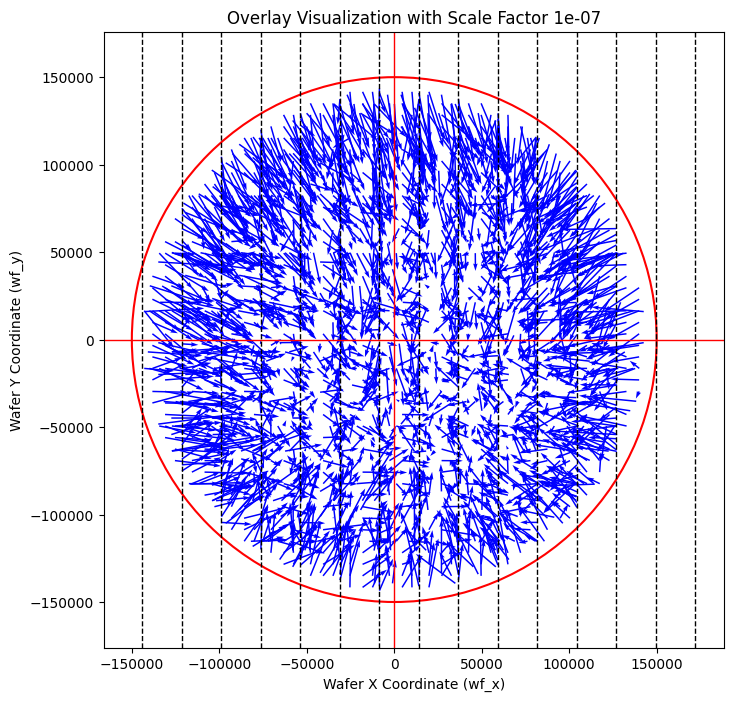

In [13]:

import matplotlib.pyplot as plt
import pandas as pd

# 엑셀 파일 읽기
file_path = 'C:/vscode/MODULE/output.xlsx'  # 실제 엑셀 파일 경로로 수정 필요
sheet_name = 'RawData-1'

df = pd.read_excel(file_path, sheet_name=sheet_name)

# 데이터 열 추출
wf_x = df['wf_x']
wf_y = df['wf_y']
overlay_x = df['X_reg']
overlay_y = df['Y_reg']
fit_x = df['pred_x']
fit_y = df['pred_y']
residual_x = df['residual_x']
residual_y = df['residual_y']
die_x = df['DieX']
die_y = df['DieY']

# STEP_PITCH_X, STEP_PITCH_Y 추출
step_pitch_x = df['STEP_PITCH_X'].iloc[0]
step_pitch_y = df['STEP_PITCH_Y'].iloc[0]
map_shift_x = df['MAP_SHIFT_X'].iloc[0]
map_shift_y = df['MAP_SHIFT_Y'].iloc[0]


# 중앙
center_x = 0
center_y = 0

# 세로선
vline0 = -(step_pitch_x)/2 + map_shift_x 
vline1 = (vline0) + step_pitch_x 
vline2 = vline1 + step_pitch_x
vline3 = vline2 + step_pitch_x
vline4 = vline3 + step_pitch_x
vline5 = vline4 + step_pitch_x
vline6 = vline5 + step_pitch_x
vline7 = vline6 + step_pitch_x
vline8 = vline7 + step_pitch_x
vline_1 = vline0 - step_pitch_x
vline_2 = vline_1 - step_pitch_x
vline_3 = vline_2 - step_pitch_x
vline_4 = vline_3 - step_pitch_x
vline_5 = vline_4 - step_pitch_x
vline_6 = vline_5 - step_pitch_x


print(type(vline1))
print(type(die_x))



# 웨이퍼 경계 설정
wafer_radius = 150000

# 시각화 함수
def plot_overlay(x, y, dx, dy, title='Wafer Vector Map', scale_factor=1e-7):
    plt.figure(figsize=(8, 8))

    # quiver 플롯 (overlay 값 화살표로 표시)
    plt.quiver(x, y, dx, dy, angles='xy', scale_units='xy', scale=scale_factor, color='blue')

    # 정중앙선
    plt.axvline(center_x, color='red', linewidth=1.0)
    plt.axhline(center_y, color='red', linewidth=1.0)

    
    # 수직선 추가 (step_pitch_x 기준)
    plt.axvline(vline0, color='black', linestyle='--', linewidth=1)
    plt.axvline(vline1, color='black', linestyle='--', linewidth=1)
    plt.axvline(vline2, color='black', linestyle='--', linewidth=1)
    plt.axvline(vline3, color='black', linestyle='--', linewidth=1)
    plt.axvline(vline4, color='black', linestyle='--', linewidth=1)
    plt.axvline(vline5, color='black', linestyle='--', linewidth=1)
    plt.axvline(vline6, color='black', linestyle='--', linewidth=1)
    plt.axvline(vline7, color='black', linestyle='--', linewidth=1)
    plt.axvline(vline8, color='black', linestyle='--', linewidth=1)
    plt.axvline(vline_1, color='black', linestyle='--', linewidth=1)
    plt.axvline(vline_2, color='black', linestyle='--', linewidth=1)
    plt.axvline(vline_3, color='black', linestyle='--', linewidth=1)
    plt.axvline(vline_4, color='black', linestyle='--', linewidth=1)
    plt.axvline(vline_5, color='black', linestyle='--', linewidth=1)
    plt.axvline(vline_6, color='black', linestyle='--', linewidth=1)

 

    # 수평선 추가 (step_pitch_y 기준)
 

    # 웨이퍼 경계 원 추가
    wafer_circle = plt.Circle((0, 0), wafer_radius, color='red', fill=False, linestyle='-', linewidth=1.5)
    plt.gca().add_patch(wafer_circle)

    # 축 설정 및 제목 추가
    plt.axis('equal')
    plt.xlabel('Wafer X Coordinate (wf_x)')
    plt.ylabel('Wafer Y Coordinate (wf_y)')
    plt.title(f'Overlay Visualization with Scale Factor {scale_factor}')
    plt.grid(False)
    
    # 그래프 출력
    plt.show()

# 사용 예시 (화살표 크기 조정 가능)
plot_overlay(wf_x, wf_y, overlay_x, overlay_y)





